# Image Read, Display and Write 

In this part we will disscuss some basic image operations. How to read, display, and write images. Example code will be showed and explained.


### Import OpenCV library
Load the OpenCV library in program. 

In [359]:
import cv2

### Image Read
In this part we will use opencv imread method to read basic images and load them in a variable.

In [361]:
image = cv2.imread('hello-world.jpg')

Different propertiese of image object returned by imread method.

In [362]:
print 'Image shape (hight, width, dimensions) : %s ' % str(image.shape)
print image.size
print image.dtype

Image shape (hight, width, dimensions) : (900, 1600, 3) 
4320000
uint8


### Image Show
In this part we will use opencv imshow method to show images.

In [5]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

To show an image in image in jupyter notebook we can use the pyplot from the matplotlib. 

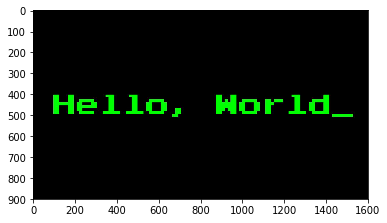

In [74]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Playing around with different dimensions
Show images with individual dimensions (B, G, R).

Lets import different image and show it.

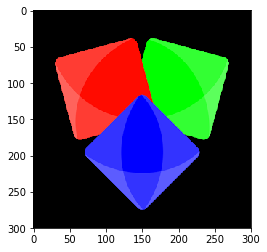

In [13]:
image = cv2.imread('bgr.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

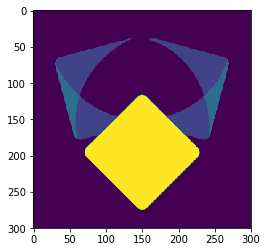

In [20]:
#Blue
image_blue = image[:, :, 0]
plt.imshow(image_blue)
plt.show()

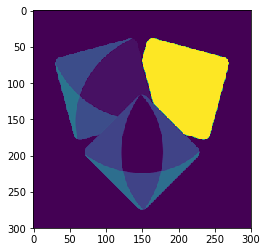

In [19]:
#Green
image_green = image[:, :, 1]
plt.imshow(image_green)
plt.show()

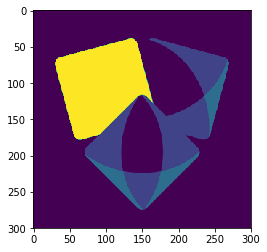

In [18]:
#Red
image_red = image[:, :, 2]
plt.imshow(image_red)
plt.show()

### Image Write:
In this part we will reshape the image than we will write it to a file. Than we will read than image and show it again to confirm it was saved ok.

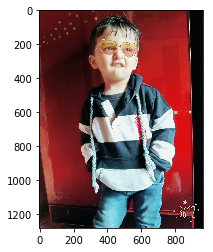

In [7]:
#Load a new image
image = cv2.imread('cute-kid.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Crop the image

In [8]:
image = image[0:500, 300:650]

Write the Image

In [9]:
cv2.imwrite('cropped_image.png', image)

True

Load the cropped Image and show. 

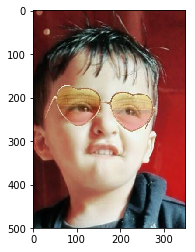

In [10]:
cropped_image = cv2.imread('cropped_image.png')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

## Simple Image Editing:
Move around region of images.

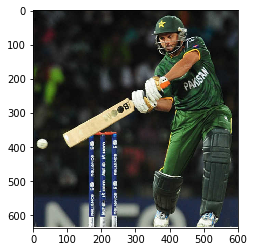

In [11]:
image = cv2.imread('afridi.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Replace some of the bat pixles with ball and ball pixles with random pixles
to make it look like ball is going to hit bat. 

In [12]:
image[330:370, 140:180] = image[372:412, 7:47]
image[372:412, 7:47] = image[412:452, 7:47]

Show image and hope afridi scors 6. 

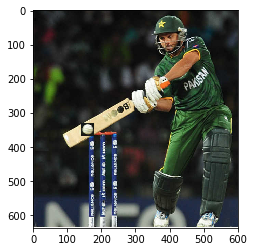

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Webcam Video Recorder
Record videos using webcam.

In [2]:
# Open the default camera
video_capture = cv2.VideoCapture(0)

In [19]:
# Verify that camera opened successfully
if not video_capture.isOpened():
    print 'Unable to open camera'
else:
    print 'Camera Open and ready to use'

Camera Open and ready to use


In [20]:
# Get default resolutions for the frames.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps_count = 20  # Frames per second

In [21]:
#Defind Video file extention(which codec to use to compress the frames)
file_type = cv2.VideoWriter_fourcc(*'mp4v')

In [22]:
# Create a VideoWriter object.
video_out = cv2.VideoWriter(
    filename='webcam_recording.mp4',
    fourcc=file_type,
    fps=fps_count,
    frameSize=(frame_width, frame_height),
    isColor=True
)

In [23]:
#Record Video Frame by Frame and write it.
while video_capture.isOpened():
    is_frame_ready, frame = video_capture.read()
    if is_frame_ready:
        video_out.write(frame)
        cv2.imshow('Webcam Recording', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
video_capture.release()
video_out.release()
cv2.destroyAllWindows()

### Play Video
Play the above recorded video.

In [24]:
# Open Video file using VideoCapture
video_capture = cv2.VideoCapture('webcam_recording.mp4')

while video_capture.isOpened():
    # Capture frame by frame
    is_frame_ready, frame = video_capture.read()
    if is_frame_ready:
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
video_capture.release()
cv2.destroyAllWindows()

## Screen Recorder
Capture system screen.

OpenCV do not provide any method to capture screen so we will use pyscreenshot to take screenshot. We will also need to import numpy to convert pyscreenshot image to opencv image.

In [84]:
import pyscreenshot as ScreenShot
import numpy as np

Create a named window to show video capture and 

In [85]:
cv2.namedWindow('vid', cv2.WINDOW_KEEPRATIO)

while True:
    img = np.array(ScreenShot.grab().convert('RGB'))
    cv2.imshow('vid',img)
    key = cv2.waitKey(1)
    if key==27:
        break
cv2.destroyAllWindows()

## Basic OCR
Simple OCR (Object Character Recognition) with KNN algorithm.

In [4]:
import numpy as np

The image we are going to use for system training.

In [6]:
digits_learning_image = cv2.imread('hand_written_data/digits.png')
cv2.imshow('image', digits_learning_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#NEED TO RECHECK
gray_digits_learning_image = cv2.cvtColor(digits_learning_image, cv2.COLOR_BGR2GRAY)

In [40]:
# Now we split the image to 5000 cells, each 20x20 size
digit_cells = [np.hsplit(row, 100) for row in np.vsplit(gray_digits_learning_image, 50)]
print 'Digit cells length : ', len(digit_cells)
print 'Digit cells width : ', len(digit_cells[1])

Digit cells length :  50
Digit cells width :  100


In [41]:
# Make it into a Numpy array. It's size will be (50,100,20,20)
digits_list = np.array(digit_cells)

In [42]:
# Now we prepare train_data and test_data.
digits_for_training = digits_list[:, :50].reshape(-1,400).astype(np.float32)  # Size=(2500,400)
digits_for_testing = digits_list[:, 50:100].reshape(-1,400).astype(np.float32)# Size=(2500,400)

In [43]:
# Create labels for training data and testing data
numbers = np.arange(10)
labels_for_training_data = np.repeat(numbers, 250)[:, np.newaxis]
labels_for_testing_data = labels_for_training_data.copy()

print "Shape of training data : ", digits_for_training.shape
print "Shape of lables for training data : ", labels_for_training_data.shape

Shape of training data :  (2500, 400)
Shape of lables for training data :  (2500, 1)


In [145]:
# Initiate kNN, train the data, then test it with test data for k=5
knn = cv2.ml.KNearest_create()
knn.train(digits_for_training, cv2.ml.ROW_SAMPLE, labels_for_training_data)
ret, result, neighbours, dist = knn.findNearest(digits_for_testing, k=4)

In [146]:
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result == labels_for_testing_data
correct = np.count_nonzero(matches)
accuracy = correct * 100.0 / result.size

print '************************* DIGITS OCR *************************'
print 'matches : ', matches
print 'correct : ', correct
print 'accuracy : ', accuracy

************************* DIGITS OCR *************************
matches :  [[ True]
 [ True]
 [ True]
 ..., 
 [ True]
 [ True]
 [ True]]
correct :  2298
accuracy :  91.92


In [358]:
digit_image_for_testing = cv2.imread('hand_written_data/3.png')
# digit_image_for_testing = cv2.imread('hand_written_data/2.png')
# digit_image_for_testing = cv2.imread('hand_written_data/3.png')
# digit_image_for_testing = cv2.imread('hand_written_data/4.png')
# digit_image_for_testing = cv2.imread('hand_written_data/5.png')
# digit_image_for_testing = cv2.imread('hand_written_data/6.png')
# digit_image_for_testing = cv2.imread('hand_written_data/7.png')
# digit_image_for_testing = cv2.imread('hand_written_data/8.png')
# digit_image_for_testing = cv2.imread('hand_written_data/9.png')


plt.imshow(digit_image_for_testing)
plt.show()

gray_image = cv2.cvtColor(digit_image_for_testing, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()

ret, thresh = cv2.threshold(gray_image, 10, 255, cv2.THRESH_OTSU)
threshold_image = cv2.threshold(thresh, 10, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(threshold_image)
plt.show()

TypeError: Image data cannot be converted to float

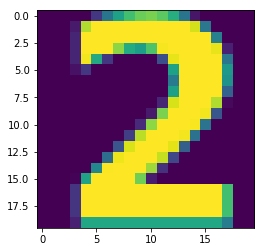

In [356]:
# Perform the resizing of the image according to our train data (20, 20)
r = 20.0 / threshold_image.shape[1]
dim = (20, int(threshold_image.shape[0] * r))
resized_image = cv2.resize(threshold_image, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_image)
plt.show()

In [357]:
# Convert to linear image and recognize the digit using KNN.
digit_in_1d_array = resized_image.reshape(-1,400).astype(np.float32)
ret, result, neighbours, dist = knn.findNearest(digit_in_1d_array, k=4)

print '************************* DIGITS OCR *************************'
print 'ret : ', ret
print 'result : ', result
print 'neighbours : ', neighbours
print 'dist : ', dist

************************* DIGITS OCR *************************
ret :  2.0
result :  [[ 2.]]
neighbours :  [[ 2.  8.  2.  8.]]
dist :  [[ 6050949.  6291074.  6323746.  6350205.]]
